In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
import shap

In [13]:
def shap_bar(shap_values, feature_name, label, color):
    values = shap_values[:, feature_name].values
    data = shap_values[:, feature_name].data
    categories = list(set(data))

    groups = []
    for o in categories:
        relevant_values = values[data == o]
        groups.append(relevant_values)

    fig, ax = plt.subplots()
    plt.figure(figsize=(8, 5))
    ax.boxplot(groups, labels=label, patch_artist=True, boxprops=dict(facecolor = color),  medianprops = dict(color = "black", linewidth = 1.5))
    ax.set_ylabel('SHAP value')
    ax.set_xlabel(feature_name)

In [14]:
df = pd.read_csv('df_ml.csv')
df_female = df[df['gender'] == 0]
df_male = df[df['gender'] == 1]

feature =  df.loc[:, ~df.columns.isin(['age_grouped', 'bullied'])].astype(int)
target =  df[['bullied']]

X, y = SMOTE().fit_resample(feature, target.values.ravel())
X_female, y_female = X[X['gender'] == 0].drop('gender', axis=1),  y[X['gender']==0]
X_male, y_male =  X[X['gender'] == 1].drop('gender', axis=1),  y[X['gender']==1]

[LightGBM] [Info] Number of positive: 4220, number of negative: 4220
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 8440, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


 98%|===================| 8249/8440 [00:31<00:00]        No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


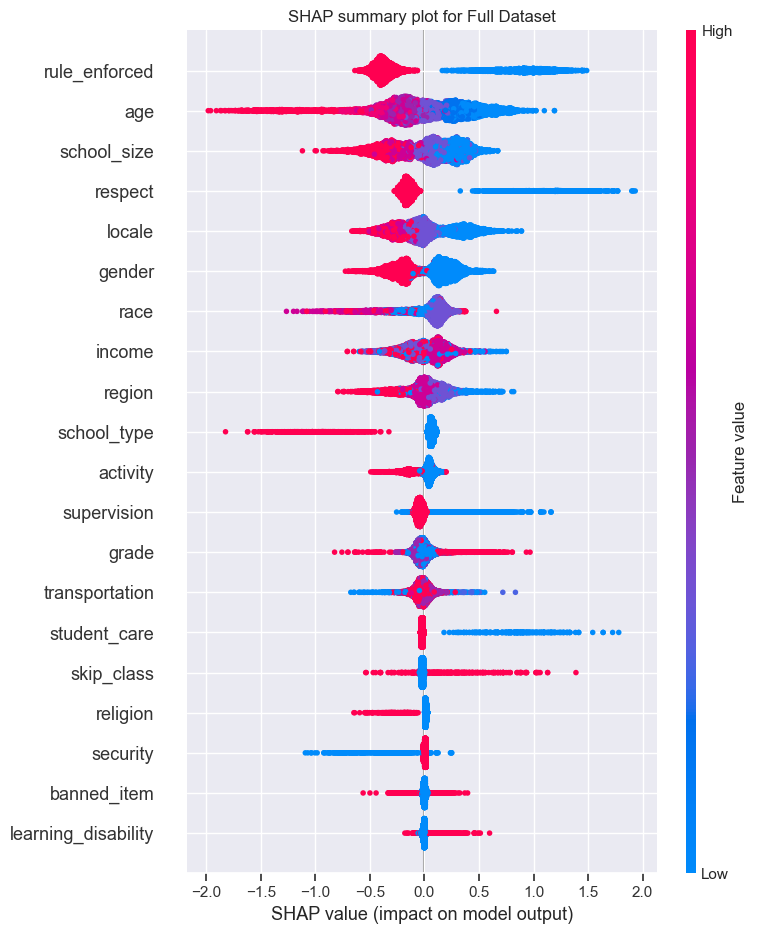

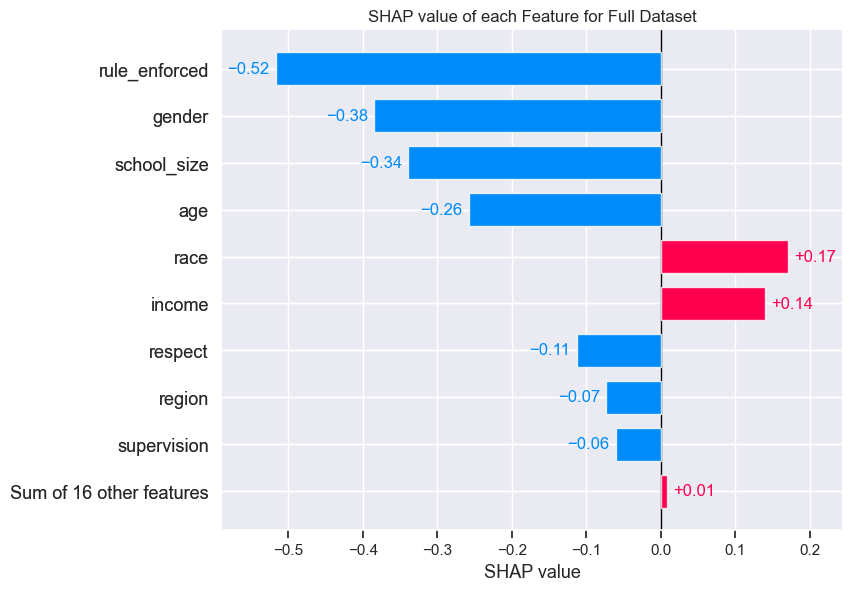

[LightGBM] [Info] Number of positive: 2571, number of negative: 2015
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 85
[LightGBM] [Info] Number of data points in the train set: 4586, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.560619 -> initscore=0.243676
[LightGBM] [Info] Start training from score 0.243676


 98%|===================| 4485/4586 [00:20<00:00]        No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


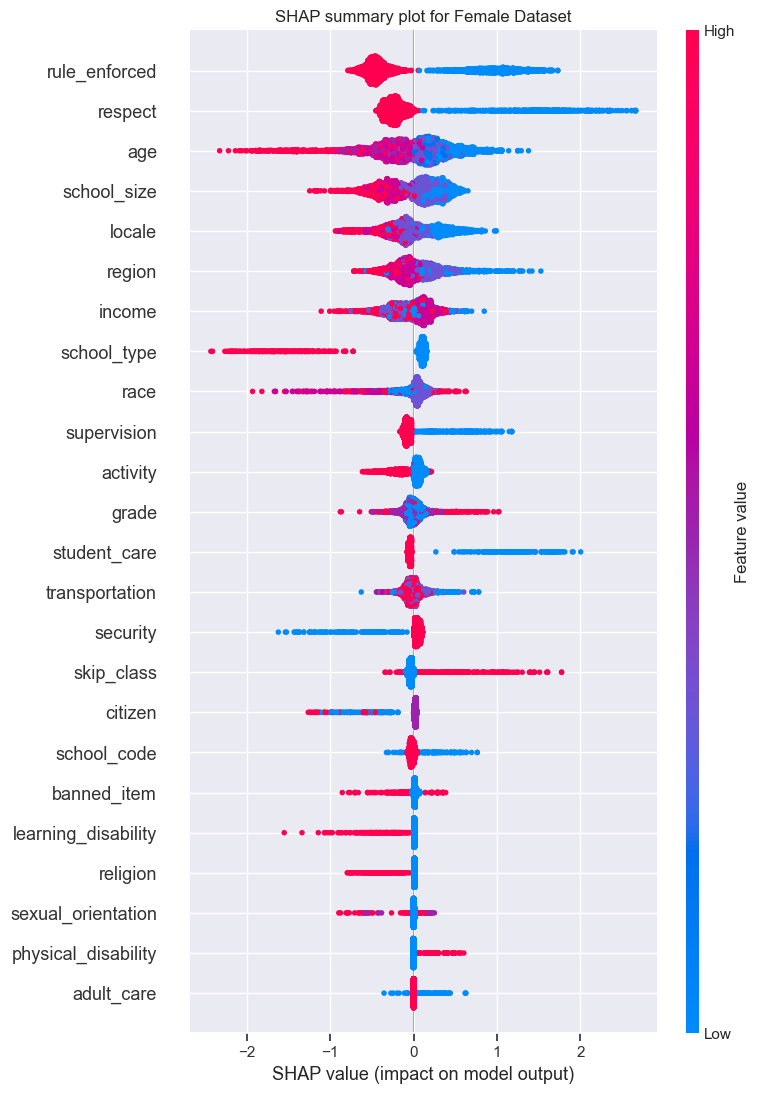

[LightGBM] [Info] Number of positive: 1649, number of negative: 2205
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 3854, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.427867 -> initscore=-0.290558
[LightGBM] [Info] Start training from score -0.290558


100%|===================| 3853/3854 [00:17<00:00]        No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


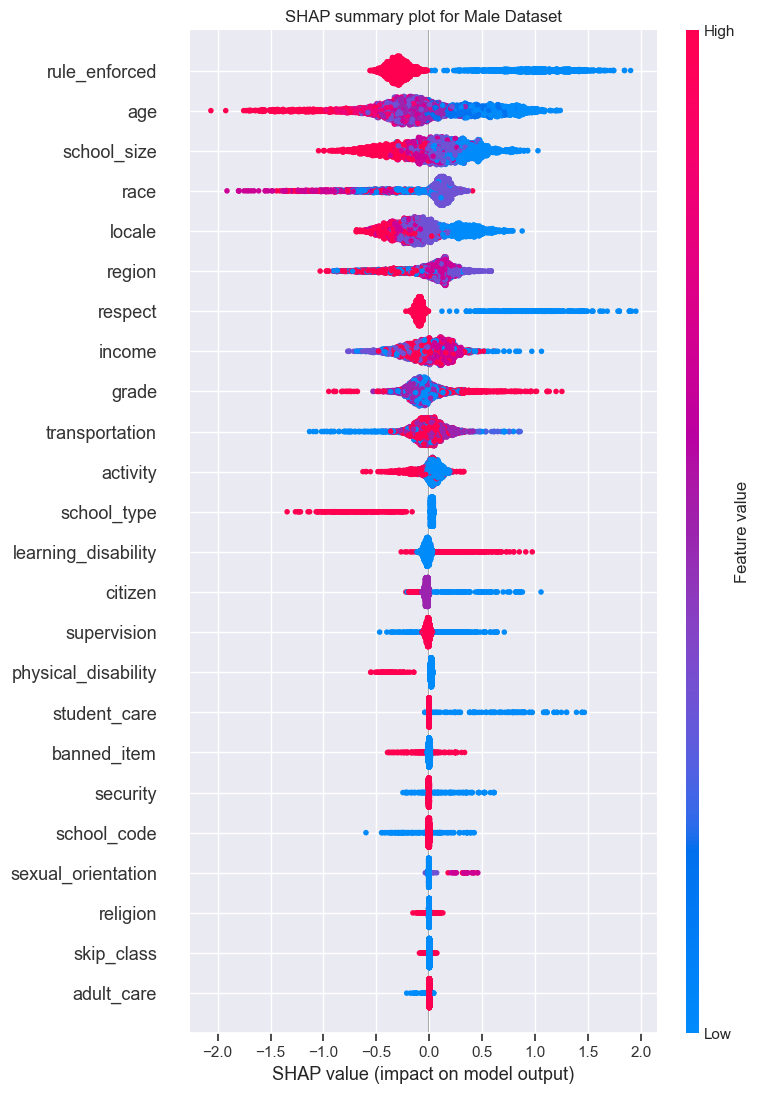

In [15]:
model = lgb.LGBMClassifier().fit(X, y)
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
plt.title('SHAP summary plot for Full Dataset')
shap.summary_plot(shap_values)
plt.title('SHAP value of each Feature for Full Dataset')
shap.plots.bar(shap_values[0])

model_female = lgb.LGBMClassifier().fit(X_female, y_female)
explainer_female = shap.Explainer(model_female, X_female)
shap_values_f = explainer_female(X_female)
plt.title('SHAP summary plot for Female Dataset')
sns.set_theme(style="darkgrid")
shap.summary_plot(shap_values_f, max_display=24)

model_male = lgb.LGBMClassifier().fit(X_male, y_male)
explainer_male = shap.Explainer(model_male, X_male)
shap_values_m = explainer_male(X_male)
plt.title('SHAP summary plot for Male Dataset')
sns.set_theme(style="darkgrid")
shap.summary_plot(shap_values_m, max_display=24)

In [ ]:
shap_values_f['activities']

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


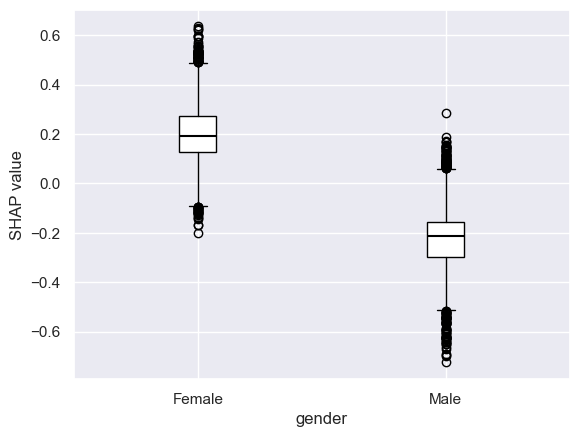

<Figure size 800x500 with 0 Axes>

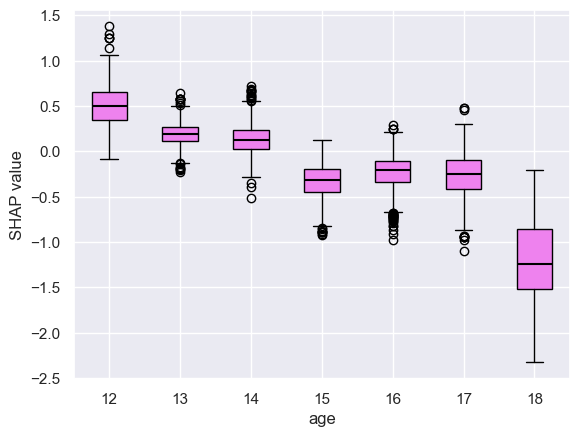

<Figure size 800x500 with 0 Axes>

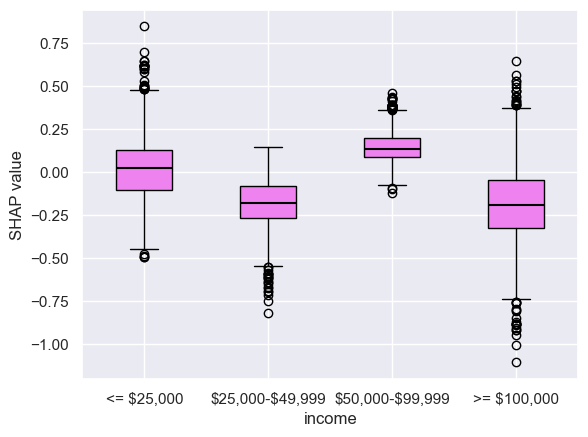

<Figure size 800x500 with 0 Axes>

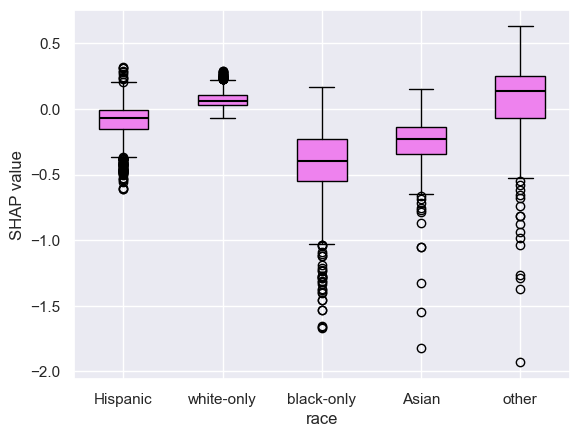

<Figure size 800x500 with 0 Axes>

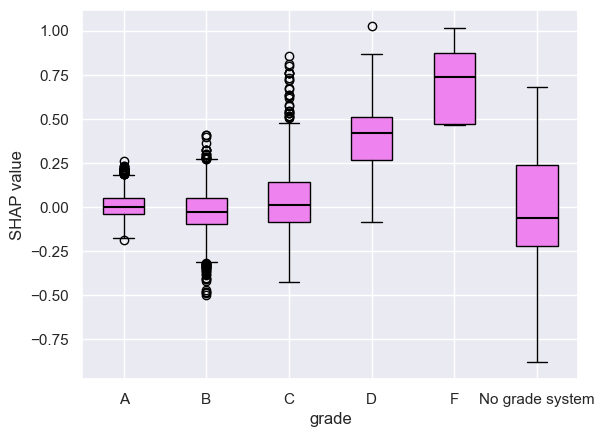

<Figure size 800x500 with 0 Axes>

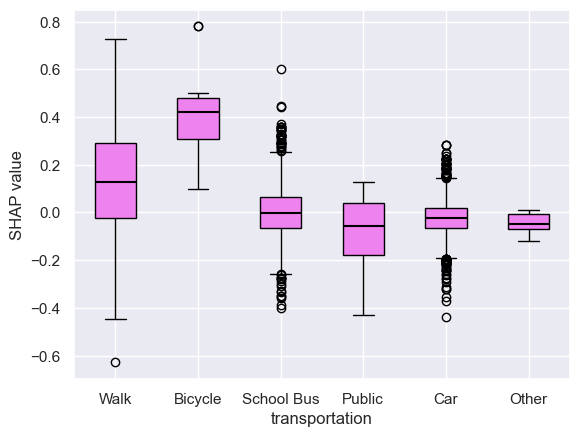

<Figure size 800x500 with 0 Axes>

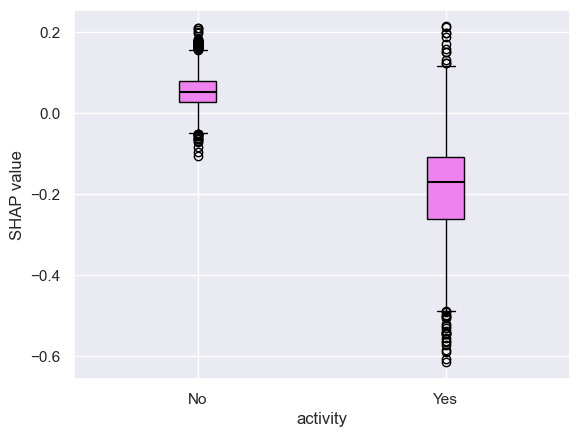

<Figure size 800x500 with 0 Axes>

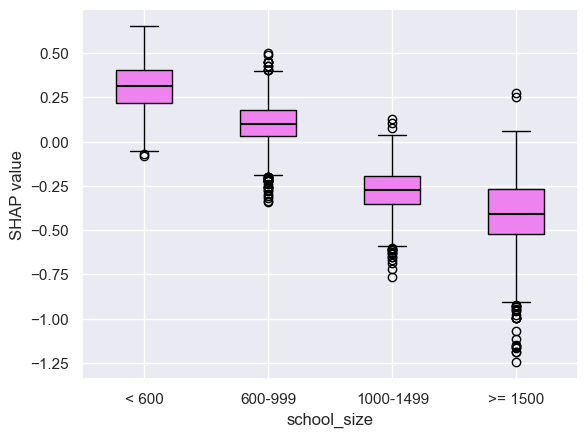

<Figure size 800x500 with 0 Axes>

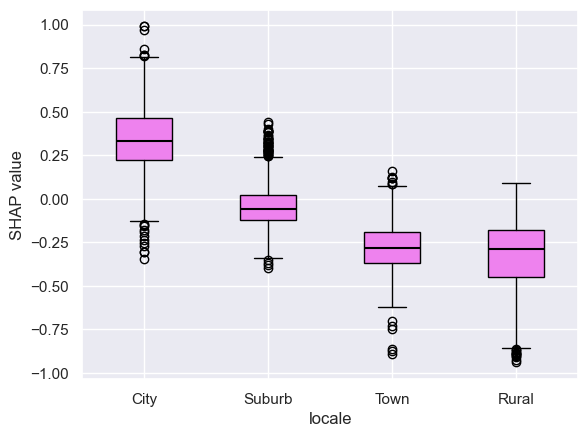

<Figure size 800x500 with 0 Axes>

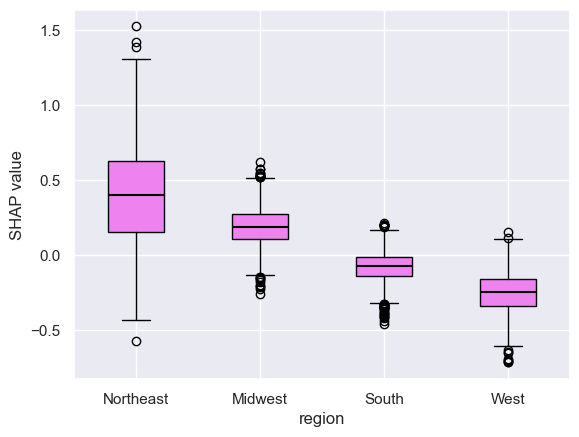

<Figure size 800x500 with 0 Axes>

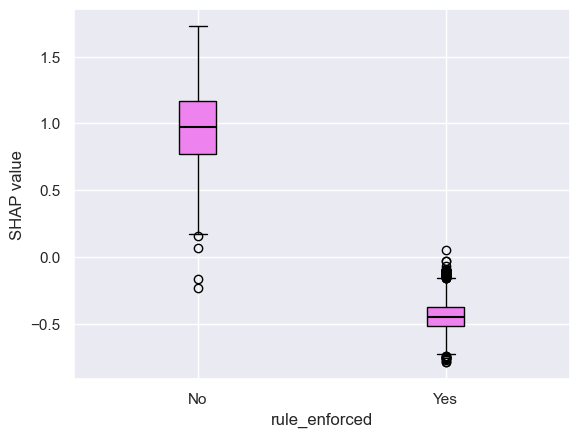

<Figure size 800x500 with 0 Axes>

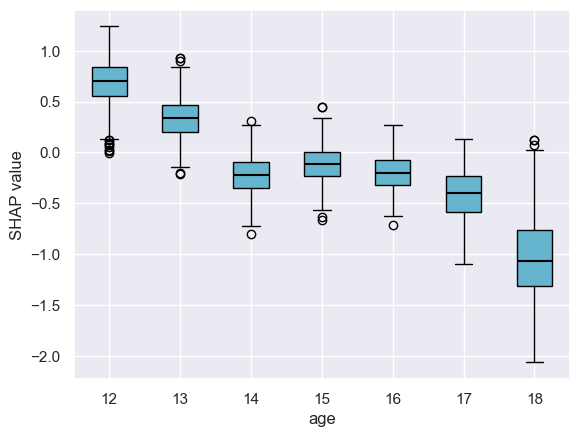

<Figure size 800x500 with 0 Axes>

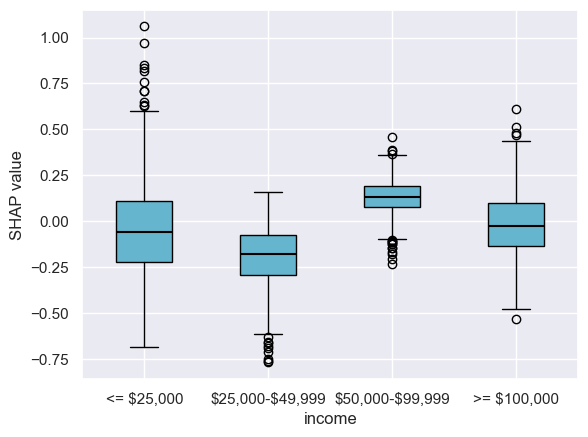

<Figure size 800x500 with 0 Axes>

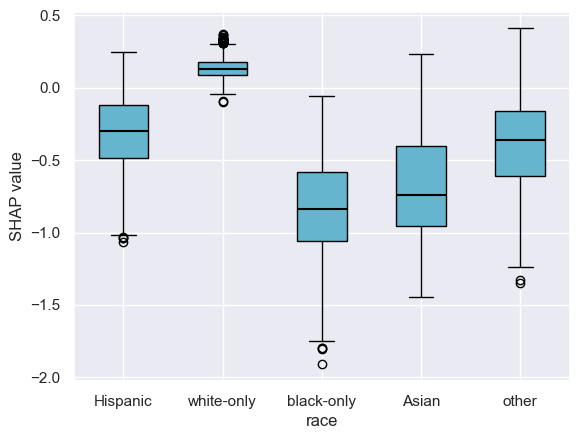

<Figure size 800x500 with 0 Axes>

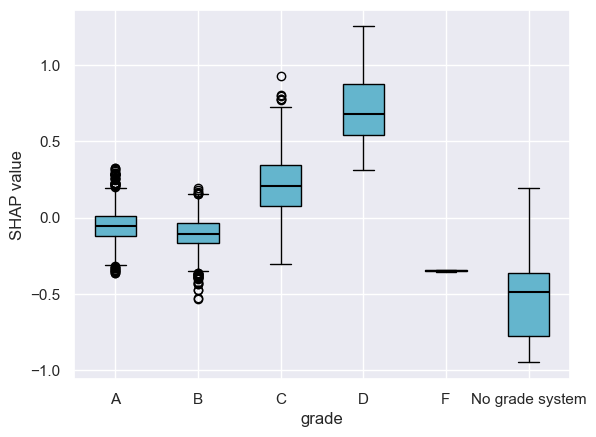

<Figure size 800x500 with 0 Axes>

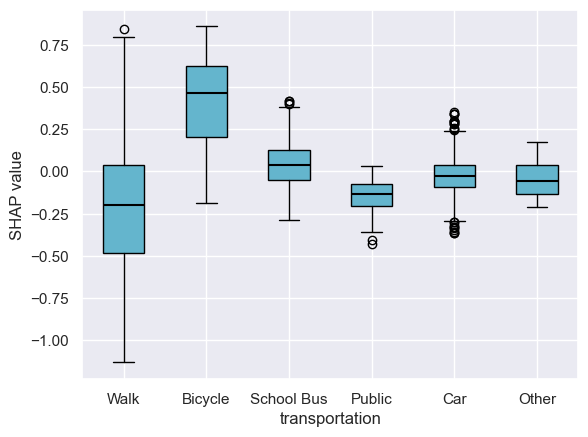

<Figure size 800x500 with 0 Axes>

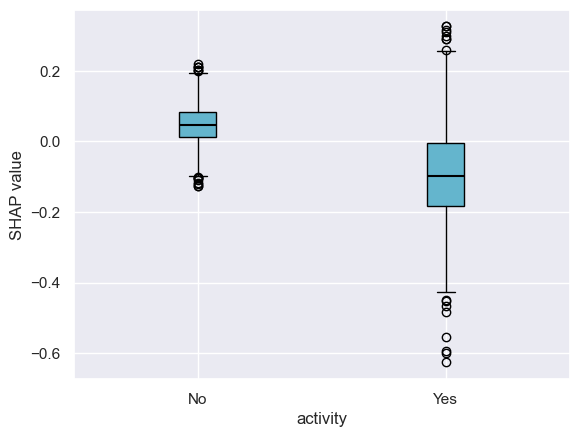

<Figure size 800x500 with 0 Axes>

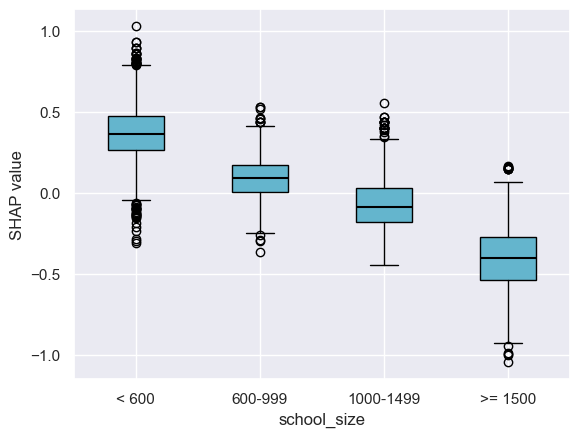

<Figure size 800x500 with 0 Axes>

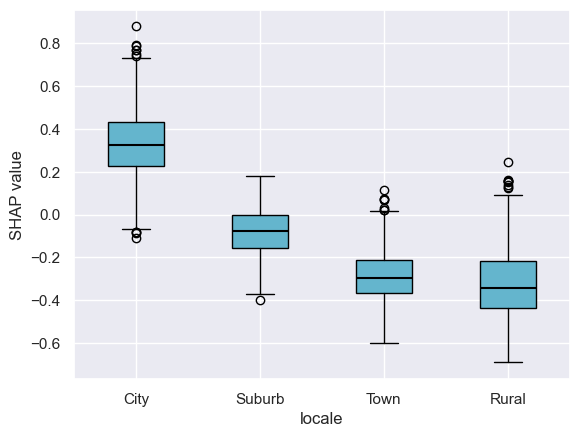

<Figure size 800x500 with 0 Axes>

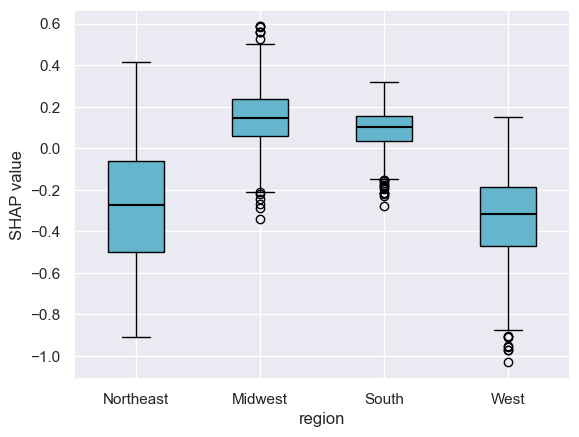

<Figure size 800x500 with 0 Axes>

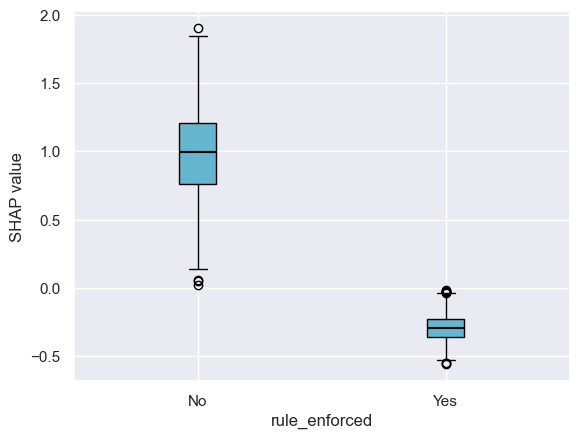

<Figure size 800x500 with 0 Axes>

In [18]:
shap_bar(shap_values, 'gender', ['Female', 'Male'], 'white')

shap_bar(shap_values_f, 'age', [12,13,14,15,16,17,18], 'violet')
shap_bar(shap_values_f, 'income', ['<= $25,000', '\$25,000-\$49,999', '\$50,000-\$99,999', '>= $100,000'], 'violet')
shap_bar(shap_values_f, 'race', ['Hispanic', 'white-only', 'black-only', 'Asian', 'other'], 'violet')
shap_bar(shap_values_f, 'grade', ['A', 'B', 'C', 'D','F', 'No grade system'], 'violet')
shap_bar(shap_values_f, 'transportation', ['Walk', 'Bicycle', 'School Bus', 'Public','Car','Other'], 'violet')
shap_bar(shap_values_f, 'activity', ['No', 'Yes'], 'violet')
shap_bar(shap_values_f, 'school_size', ['< 600', '600-999', '1000-1499', '>= 1500'], 'violet')
shap_bar(shap_values_f, 'locale', ['City', 'Suburb', 'Town', 'Rural'], 'violet')
shap_bar(shap_values_f, 'region', ['Northeast', 'Midwest', 'South', 'West'], 'violet')
shap_bar(shap_values_f, 'rule_enforced', ['No', 'Yes'], 'violet')


shap_bar(shap_values_m, 'age', [12,13,14,15,16,17,18], 'c')
shap_bar(shap_values_m, 'income', ['<= $25,000', '\$25,000-\$49,999', '\$50,000-\$99,999', '>= $100,000'], 'c')
shap_bar(shap_values_m, 'race', ['Hispanic', 'white-only', 'black-only', 'Asian', 'other'], 'c')
shap_bar(shap_values_m, 'grade', ['A', 'B', 'C', 'D','F', 'No grade system'], 'c')
shap_bar(shap_values_m, 'transportation', ['Walk', 'Bicycle', 'School Bus', 'Public','Car','Other'], 'c')
shap_bar(shap_values_m, 'activity', ['No', 'Yes'], 'c')
shap_bar(shap_values_m, 'school_size', ['< 600', '600-999', '1000-1499', '>= 1500'], 'c')
shap_bar(shap_values_m, 'locale', ['City', 'Suburb', 'Town', 'Rural'], 'c')
shap_bar(shap_values_m, 'region', ['Northeast', 'Midwest', 'South', 'West'], 'c')
shap_bar(shap_values_m, 'rule_enforced', ['No', 'Yes'], 'c')


In [19]:
X_male['sexual_orientation'].value_counts()

1    3821
3      17
4       8
2       8
Name: sexual_orientation, dtype: int64

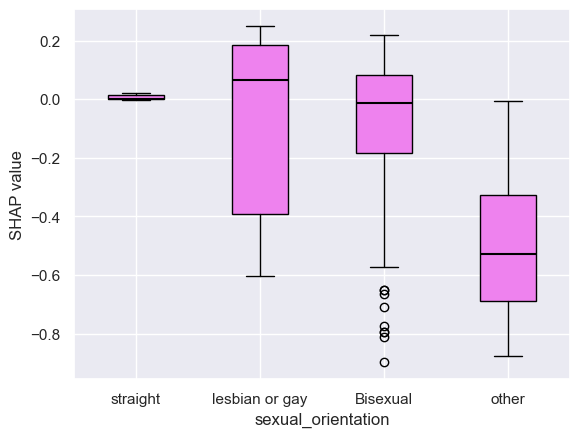

<Figure size 800x500 with 0 Axes>

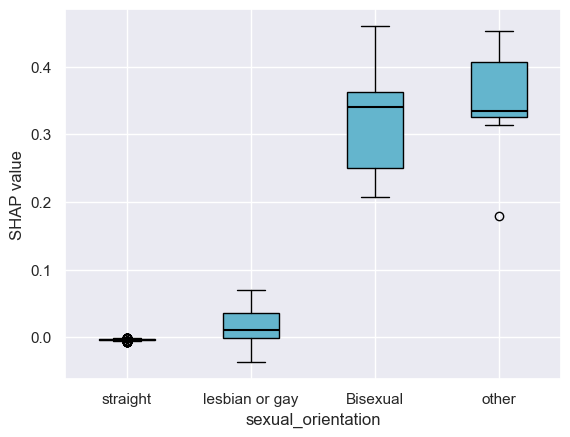

<Figure size 800x500 with 0 Axes>

In [21]:
shap_bar(shap_values_f, 'sexual_orientation', ['straight', 'lesbian or gay', 'Bisexual', 'other'], 'violet')
shap_bar(shap_values_m, 'sexual_orientation', ['straight', 'lesbian or gay', 'Bisexual', 'other'], 'c')


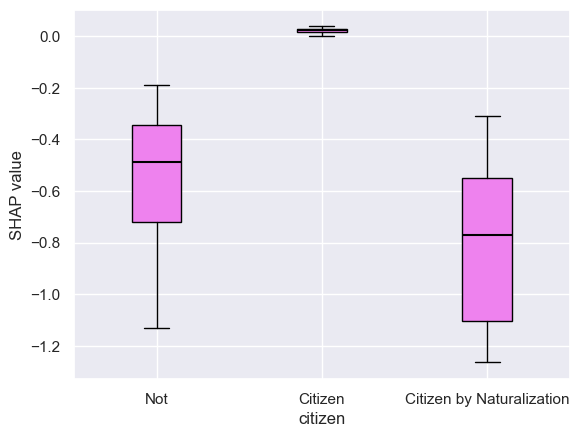

<Figure size 800x500 with 0 Axes>

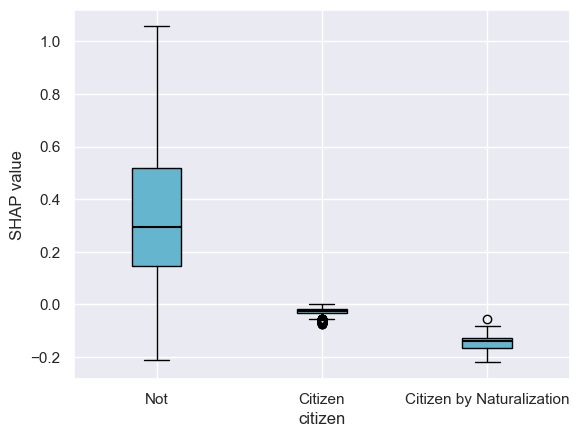

<Figure size 800x500 with 0 Axes>

In [22]:
shap_bar(shap_values_f, 'citizen', ['Not', 'Citizen', 'Citizen by Naturalization'], 'violet')
shap_bar(shap_values_m, 'citizen', ['Not', 'Citizen', 'Citizen by Naturalization'], 'c')